In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("data.csv", index_col=0)

# get rid of 'heuristic' column
data = data.drop("heuristic", axis=1)

print(data.head())

   pid  n method  visited_nodes  time  tree_size
0    0  5   mcts             10   0.0          8
1    0  5     bt              7   0.0         18
2    1  5   mcts             10   0.0          8
3    1  5     bt             14   0.0         25
4    2  5   mcts             28   0.0          7


Data cleaning

In [16]:
sorted_time = data.sort_values("time", ascending=False)
print(sorted_time.head(10))

      pid   n method  visited_nodes       time  tree_size
1664  832  13   mcts         532490  64.421875      28703
1762  881  13   mcts         424858  46.906250      53200
1704  852  13   mcts         252602  26.687500      31680
1693  846  13     bt          67815  23.796875      67932
1672  836  13   mcts         175861  23.656250      25172
1296  648  11   mcts         495295  22.171875       6515
1780  890  13   mcts         161461  21.843750      20294
1716  858  13   mcts         144294  21.781250      23137
1777  888  13     bt          54622  17.250000      54728
1470  735  12   mcts         204687  14.812500      14116


In [25]:
data_filtered_time = pd.DataFrame()
groups = data.groupby(["n", "method"])

for group_name, group_data in groups:
    q1 = group_data['time'].quantile(0.25)
    q3 = group_data['time'].quantile(0.75)
    iqr = q3 - q1

    group_filtered = group_data[
        (group_data['time'] >= q1 - 1.5 * iqr) &
        (group_data['time'] <= q3 + 1.5 * iqr)
    ]

    data_filtered_time = pd.concat([data_filtered_time, group_filtered])

print(len(data_filtered_time))

1600


Means, grouped by method and n, In a table and plotted.

In [33]:
# Averages, grouped by method and n
means = data.groupby(["method", "n"])[["time", "visited_nodes", "tree_size"]].mean()
print(means)

               time  visited_nodes  tree_size
method n                                     
bt     5   0.000781           7.91      15.90
       6   0.001250          15.33      28.50
       7   0.001719          28.98      51.35
       8   0.005938          71.31     102.59
       9   0.019844         182.15     225.47
       10  0.054531         400.50     459.96
       11  0.154844         955.50    1032.81
       12  0.552500        2519.08    2615.29
       13  1.616875        6046.21    6165.69
mcts   5   0.000000          23.59       6.46
       6   0.001094          74.28      15.07
       7   0.006406         263.09      33.03
       8   0.015312         481.05      74.14
       9   0.068437        1919.89     232.49
       10  0.252812        4764.92     545.02
       11  0.633906       10335.90     765.23
       12  1.088594       10595.84    1492.28
       13  4.082344       30233.08    4170.26


Text(0.5, 1.0, 'Boxplot of time taken by each algorithm')

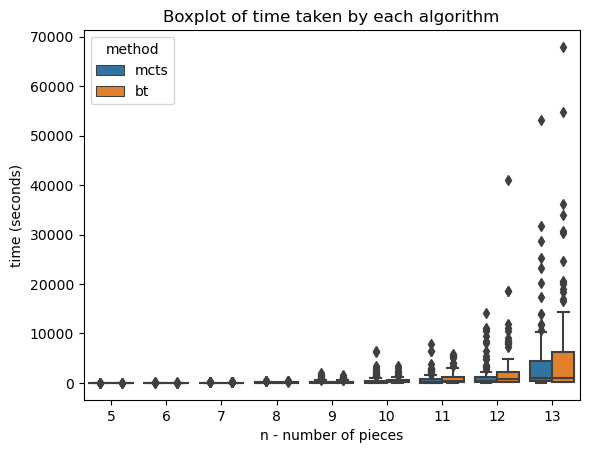

In [38]:
sns.boxplot(data=data, y="tree_size", x="n", hue="method")
plt.xlabel('n - number of pieces')
plt.ylabel('time (seconds)')
plt.title('Boxplot of time taken by each algorithm')